In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

In [2]:
dataset=pd.read_csv("train.csv")
dataset.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


In [3]:
dataset.isna().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [3]:
dataset=dataset.fillna("Missing")
dataset.isna().sum()
dataset.shape

(7613, 5)

In [4]:
#cleaning the string
def clean_str(string):
    string = re.sub(r'http\S+', 'link', string) # replace links by generic text link
    string = re.sub(r"[^A-Za-z0-9(),!?\'\`]", " ", string)
    string = re.sub(r"\'s", " \'s", string)
    string = re.sub(r"\'ve", " \'ve", string)
    string = re.sub(r"n\'t", " n\'t", string)
    string = re.sub(r"\'re", " \'re", string)
    string = re.sub(r"\'d", " \'d", string)
    string = re.sub(r"\'ll", " \'ll", string)
    string = re.sub(r",", " , ", string)
    string = re.sub(r"!", " ! ", string)
    string = re.sub(r"\(", " \( ", string)
    string = re.sub(r"\)", " \) ", string)
    string = re.sub(r"\?", " \? ", string)
    string = re.sub(r"\s{2,}", " ", string)

    cleanr = re.compile('<.*?>')

    string = re.sub(r'\d+', '', string)
    string = re.sub(cleanr, '', string)
    string = re.sub("'", '', string)
    string = re.sub(r'\W+', ' ', string)
    string = string.replace('_', '')

    return string.strip().lower()

In [5]:
#Removing the stop words
stop_words = set(stopwords.words('english'))

def remove_stopwords(word_list):
    no_stop_words = [w for w in word_list if not w in stop_words]
    return no_stop_words

In [6]:
y=dataset.target
x=dataset.drop("target",axis=1)

from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test=train_test_split(x,y,test_size=0.2, random_state=40)

In [7]:
#hyperparameters
vocab_size=10000
embedding_dim=64
max_length=120
trunc_type='post'
oov_tok="<OOV>"

In [8]:
train_text=X_train.text
test_text=X_test.text

In [9]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_text_tokenizer=Tokenizer(num_words=vocab_size, oov_token=oov_tok)
train_text_tokenizer.fit_on_texts(train_text)
train_text_sequences=train_text_tokenizer.texts_to_sequences(train_text)
train_text_padded=pad_sequences(train_text_sequences,maxlen=max_length,truncating=trunc_type)

test_text_sequences=train_text_tokenizer.texts_to_sequences(test_text)
test_text_padded=pad_sequences(test_text_sequences, maxlen=max_length, truncating=trunc_type)

In [10]:
model=tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(128,5,activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [11]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
num_epochs=25
history=model.fit(train_text_padded,y_train, epochs=num_epochs, validation_data=(test_text_padded, y_test))

Epoch 1/25


UnknownError: 2 root error(s) found.
  (0) Unknown:  Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[node sequential/conv1d/conv1d (defined at <ipython-input-11-ecaff49e96d3>:3) ]]
	 [[gradient_tape/sequential/embedding/embedding_lookup/Reshape/_46]]
  (1) Unknown:  Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[node sequential/conv1d/conv1d (defined at <ipython-input-11-ecaff49e96d3>:3) ]]
0 successful operations.
0 derived errors ignored. [Op:__inference_train_function_1016]

Function call stack:
train_function -> train_function


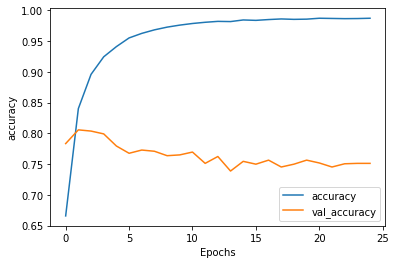

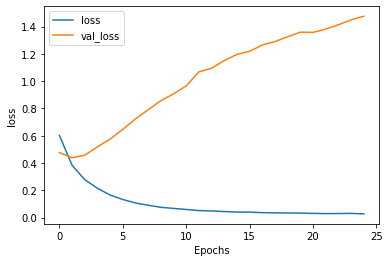

In [15]:
import matplotlib.pyplot as plt

def plot_graphs(history,string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history,"loss")

In [16]:
model=tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
num_epochs=25
history=model.fit(train_text_padded,y_train, epochs=num_epochs, validation_data=(test_text_padded, y_test))

Epoch 1/25
191/191 [==============================] - 15s 78ms/step - loss: 0.5581 - accuracy: 0.7148 - val_loss: 0.4387 - val_accuracy: 0.7978
Epoch 2/25
191/191 [==============================] - 14s 71ms/step - loss: 0.3468 - accuracy: 0.8576 - val_loss: 0.4662 - val_accuracy: 0.8056
Epoch 3/25
191/191 [==============================] - 14s 71ms/step - loss: 0.2831 - accuracy: 0.8985 - val_loss: 0.4881 - val_accuracy: 0.8004
Epoch 4/25
191/191 [==============================] - 13s 70ms/step - loss: 0.1841 - accuracy: 0.9312 - val_loss: 0.5856 - val_accuracy: 0.7735
Epoch 5/25
191/191 [==============================] - 13s 70ms/step - loss: 0.1338 - accuracy: 0.9511 - val_loss: 0.6514 - val_accuracy: 0.7682
Epoch 6/25
191/191 [==============================] - 14s 71ms/step - loss: 0.0979 - accuracy: 0.9670 - val_loss: 0.6968 - val_accuracy: 0.7708
Epoch 7/25
191/191 [==============================] - 17s 87ms/step - loss: 0.0788 - accuracy: 0.9731 - val_loss: 0.8051 - val_accuracy:

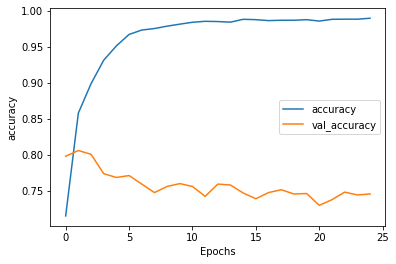

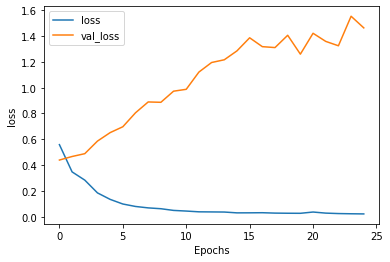

In [17]:
plot_graphs(history, "accuracy")
plot_graphs(history,"loss")

In [63]:
test=pd.read_csv("test.csv")
test.shape

(3263, 4)

In [62]:
test_text_sequences=train_text_tokenizer.texts_to_sequences(test.text)
test_text_padded=pad_sequences(test_text_sequences, maxlen=max_length, truncating=trunc_type)

y=model.predict(test_text_padded)

In [56]:
y

array([[0.96445125],
       [0.982519  ],
       [0.998948  ],
       ...,
       [0.986524  ],
       [0.43559542],
       [0.9700066 ]], dtype=float32)

In [69]:
predictions=[]
for i in y:
    if i>0.5:
        predictions.append(1)
        
    else:
        predictions.append(0)
predictions=np.array(predictions)
predictions

array([1, 1, 1, ..., 1, 0, 1])

In [70]:
np.savetxt('submission.csv', 
           np.c_[test.id,predictions], 
           delimiter=',', 
           header = 'id,target', 
           comments = '', 
           fmt='%d')

In [71]:
test.shape[0]

3263

In [68]:
predictions.shape

(3263,)